## Name : Prachi Ranjan
## Contact No: +91 8106694870
## Mail ID : pra.rjn@gmail.com
## Oasis Infobyte Data Science Internship
## Github Link: https://github.com/PrachiRanjan3/OIBSIP
## Task 5 : Sales Prediction using Python

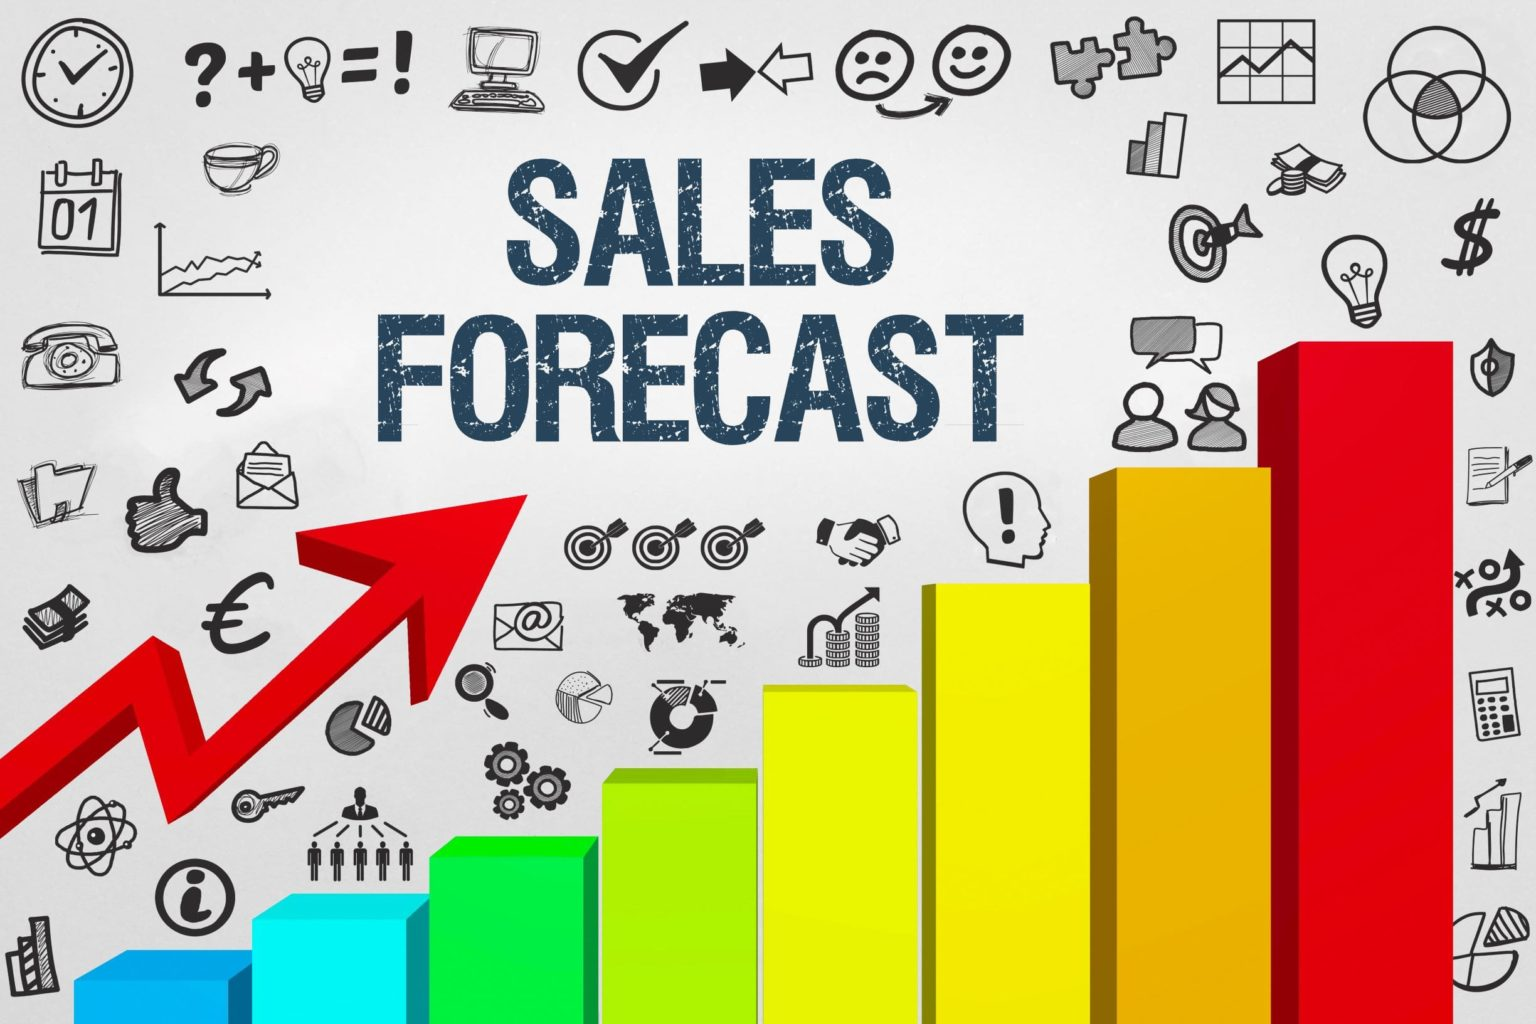
### Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

## Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib
from warnings import filterwarnings
filterwarnings(action='ignore')

C:\Users\prach\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Exploring the dataset

In [2]:
sales_data = pd.read_csv('Advertising.csv')
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
sales_data.drop(['Unnamed: 0'], axis=1, inplace =True)

In [5]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
sales_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
#sales_data.to_csv('cleaned_data.csv')

In [8]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
sales_data.duplicated().sum()

0

## Checking Outliers

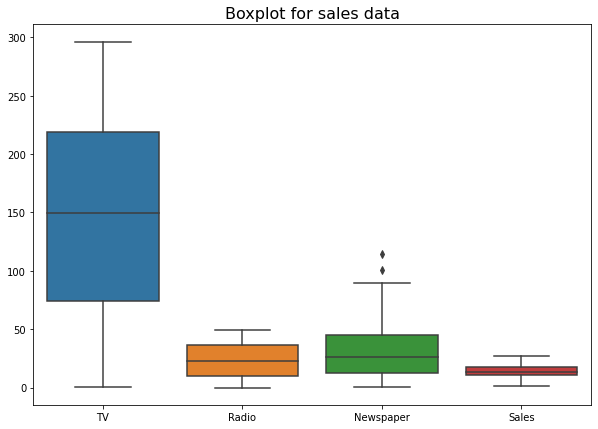

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(data= sales_data)
plt.title('Boxplot for sales data', fontsize=16)
plt.show()

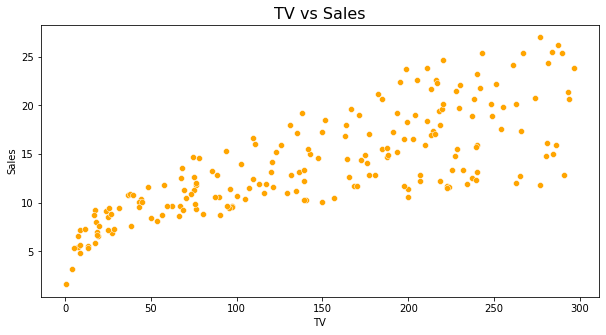

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'TV', y='Sales', data=sales_data, color='orange')
plt.title('TV vs Sales', fontsize= 16)
plt.show()

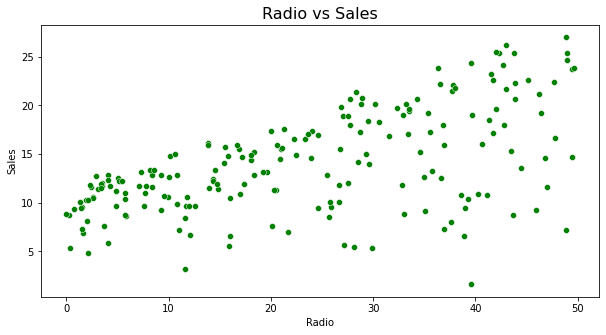

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'Radio', y='Sales', data=sales_data, color='g')
plt.title('Radio vs Sales', fontsize= 16)
plt.show()

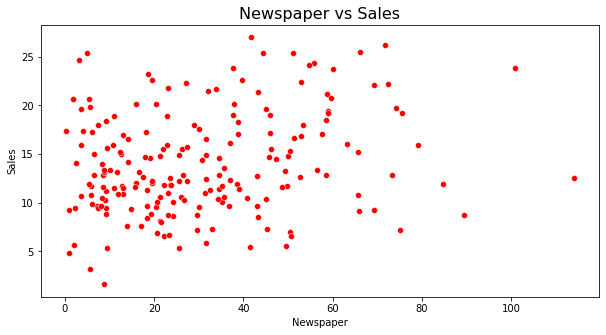

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'Newspaper', y='Sales', data=sales_data, color='r')
plt.title('Newspaper vs Sales', fontsize= 16)
plt.show()

## Histogram Distribution

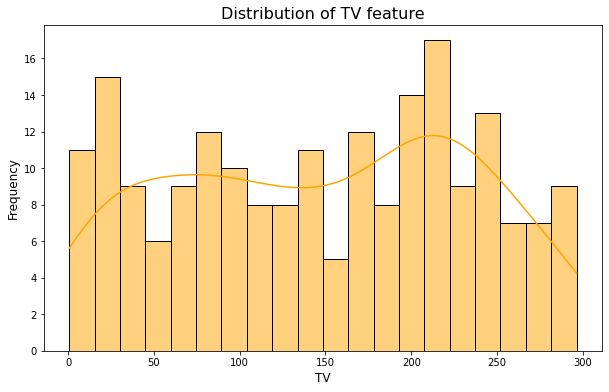

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(sales_data['TV'], color='orange', kde=True, bins=20)
plt.title('Distribution of TV feature', fontsize= 16)
plt.xlabel('TV', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

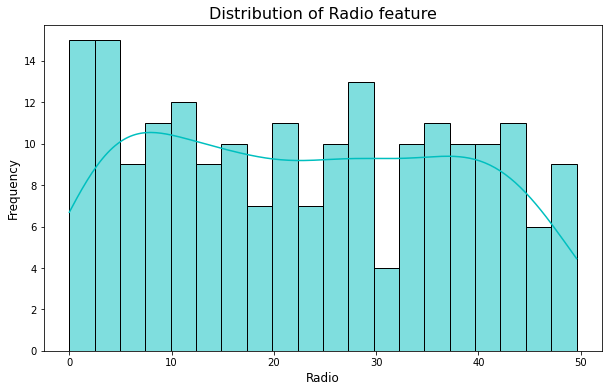

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(sales_data['Radio'], color='c', kde=True, bins=20)
plt.title('Distribution of Radio feature', fontsize= 16)
plt.xlabel('Radio', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

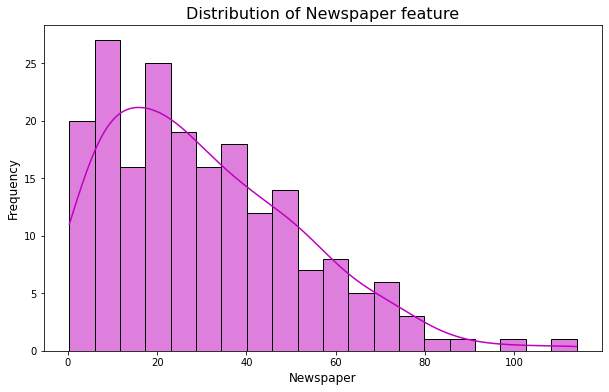

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(sales_data['Newspaper'], color='m', kde=True, bins=20)
plt.title('Distribution of Newspaper feature', fontsize= 16)
plt.xlabel('Newspaper', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

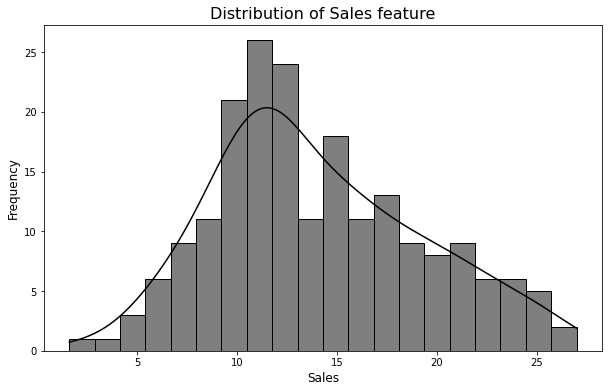

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(sales_data['Sales'], color='k', kde=True, bins=20)
plt.title('Distribution of Sales feature', fontsize= 16)
plt.xlabel('Sales', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

In [18]:
correlation=sales_data.corr()
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


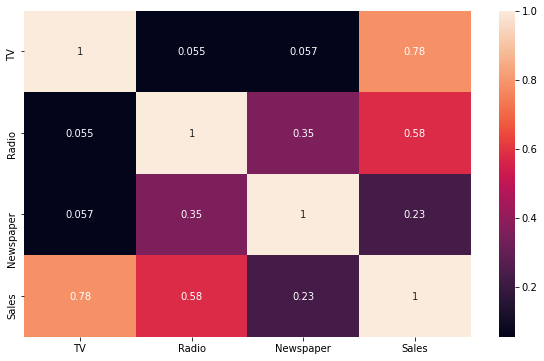

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True)
plt.show()

## Preparing the data for training and testing of model

In [20]:
x= sales_data.iloc[:, :3]
y=sales_data.iloc[:,3:]

In [21]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

## Training the data using Linear Regression

In [22]:
model_1 = LinearRegression().fit(x_train, y_train)

## Evaluating the performance using Linear Regression

In [23]:
y_pred_1= model_1.predict(x_test)

In [24]:
mse_1= mean_squared_error(y_test, y_pred_1)
r2_1  = r2_score(y_test, y_pred_1)
print('Mean Squared Error: ', mse_1)
print('R2 Squared: ', r2_1)

Mean Squared Error:  4.4021182914496855
R2 Squared:  0.8601145185017868


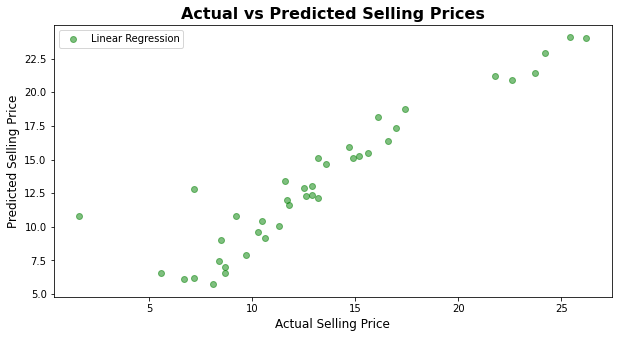

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_1, color='g', label ='Linear Regression', alpha = 0.5);
plt.xlabel('Actual Selling Price', fontsize =12)
plt.ylabel('Predicted Selling Price', fontsize =12)
plt.title('Actual vs Predicted Selling Prices', fontsize=16, fontdict={'weight':'bold'})
plt.legend()
plt.show()

## Training the data using Random Forest Regression

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [27]:
model_2 = RandomForestRegressor().fit(x_train, y_train)

## Evaluating the performance using Random Forest Regression

In [28]:
y_pred_2= model_2.predict(x_test)

In [29]:
mse_2= mean_squared_error(y_test, y_pred_2)
r2_2  = r2_score(y_test, y_pred_2)
print('Mean Squared Error: ', mse_2)
print('R2 Squared: ', r2_2)

Mean Squared Error:  0.8942786500000002
R2 Squared:  0.9715826356161761


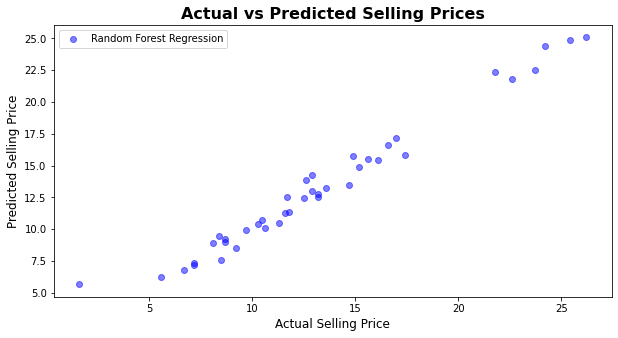

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_2, color='b', label ='Random Forest Regression', alpha = 0.5);
plt.xlabel('Actual Selling Price', fontsize =12)
plt.ylabel('Predicted Selling Price', fontsize =12)
plt.title('Actual vs Predicted Selling Prices', fontsize=16, fontdict={'weight':'bold'})
plt.legend()
plt.show()

## Training the data using XGBoost Regression

In [31]:
model_3 = XGBRegressor().fit(x_train, y_train)

## Evaluating the performance using XGBoost Regression

In [32]:
y_pred_3= model_3.predict(x_test)

In [33]:
mse_3= mean_squared_error(y_test, y_pred_3)
r2_3  = r2_score(y_test, y_pred_3)
print('Mean Squared Error: ', mse_3)
print('R2 Squared: ', r2_3)

Mean Squared Error:  0.7660167755572883
R2 Squared:  0.9756583948021869


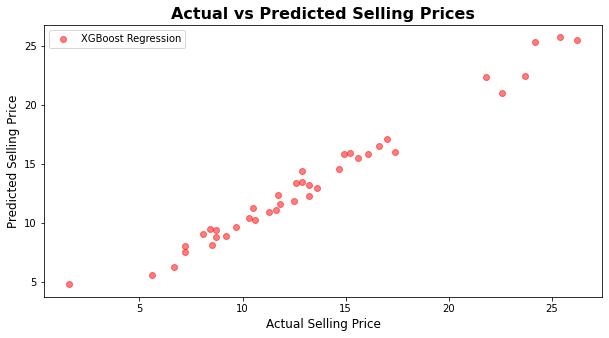

In [34]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_3, color='r', label ='XGBoost Regression', alpha = 0.5);
plt.xlabel('Actual Selling Price', fontsize =12)
plt.ylabel('Predicted Selling Price', fontsize =12)
plt.title('Actual vs Predicted Selling Prices', fontsize=16, fontdict={'weight':'bold'})
plt.legend()
plt.show()

In [35]:
model_r2_scores = {
     "Linear Regression":  r2_score(y_test, y_pred_1),
     "Random Forest Regression":  r2_score(y_test, y_pred_2),
     "XGBoost Regression":  r2_score(y_test, y_pred_3)
}
print('r2_scores for each model:- ')
model_r2_scores

r2_scores for each model:- 


{'Linear Regression': 0.8601145185017868,
 'Random Forest Regression': 0.9715826356161761,
 'XGBoost Regression': 0.9756583948021869}

In [36]:
Best_model = max(model_r2_scores, key=model_r2_scores.get)
Best_r2_score = model_r2_scores[Best_model]

print(f"Best Performing Model is {Best_model} with an R^2 score of {Best_r2_score}")

Best Performing Model is XGBoost Regression with an R^2 score of 0.9756583948021869


In [37]:
joblib.dump(model_3, 'XGBoost_Regression_model.pkl')

['XGBoost_Regression_model.pkl']

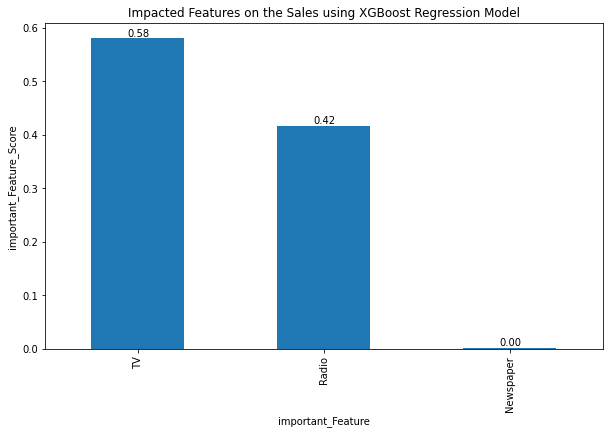

In [38]:
feature_importances = pd.Series(model_3.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 6))
features = feature_importances
features.plot(kind='bar')
plt.xlabel('important_Feature')
plt.ylabel('important_Feature_Score')
plt.title('Impacted Features on the Sales using XGBoost Regression Model')
for index, value in enumerate(features):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()